In [1]:
from cats_model import Cats_Model
from data_utils import load_data, get_minibatches
import os
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
X_tr, Y_tr, X_val, Y_val, X_te, Y_te = load_data('datasets')

In [3]:
def caption(idx, prob):
    if idx==1:
        return "cat: " + str(prob)
    return "dog: " + str(prob)

print(caption(1, 0.99))

cat: 0.99


# Load VGG16 model

Running VGG16 model with another FC layer (1000, 2). Only this layer's parameters are trainable.

Pre-trained weights can be found [here](https://www.cs.toronto.edu/~frossard/post/vgg16/)

In [4]:
tf.reset_default_graph()
model = Cats_Model()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
model.load_weights(os.path.join("vgg16", "vgg16_weights.npz"), sess)

0 conv1_1_W (32,) conv1_1//weights:0
1 conv1_1_b (32,) conv1_1//biases:0
2 conv1_2_W (32,) conv1_2//weights:0
3 conv1_2_b (32,) conv1_2//biases:0
4 conv2_1_W (32,) conv2_1//weights:0
5 conv2_1_b (32,) conv2_1//biases:0
6 conv2_2_W (32,) conv2_2//weights:0
7 conv2_2_b (32,) conv2_2//biases:0
8 conv3_1_W (32,) conv3_1//weights:0
9 conv3_1_b (32,) conv3_1//biases:0
10 conv3_2_W (32,) conv3_2//weights:0
11 conv3_2_b (32,) conv3_2//biases:0
12 conv3_3_W (32,) conv3_3//weights:0
13 conv3_3_b (32,) conv3_3//biases:0
14 conv4_1_W (32,) conv4_1//weights:0
15 conv4_1_b (32,) conv4_1//biases:0
16 conv4_2_W (32,) conv4_2//weights:0
17 conv4_2_b (32,) conv4_2//biases:0
18 conv4_3_W (32,) conv4_3//weights:0
19 conv4_3_b (32,) conv4_3//biases:0
20 conv5_1_W (32,) conv5_1//weights:0
21 conv5_1_b (32,) conv5_1//biases:0
22 conv5_2_W (32,) conv5_2//weights:0
23 conv5_2_b (32,) conv5_2//biases:0
24 conv5_3_W (32,) conv5_3//weights:0
25 conv5_3_b (32,) conv5_3//biases:0
26 fc6_W (32,) fc6//weights:0
27 fc

### Predict w/o finetune

In [5]:
preds, probs = model.predict(sess, (X_te, Y_te), 32)

391/391 [==============================] - 497s   


In [11]:
indicies = np.arange(Y_te.shape[0])
np.random.shuffle(indicies)

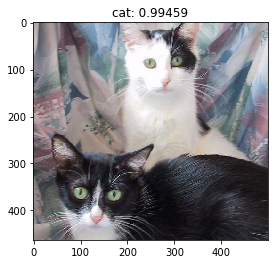

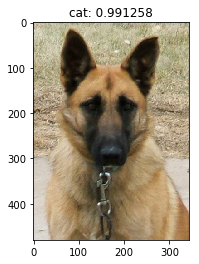

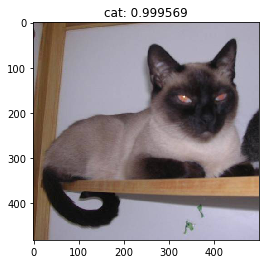

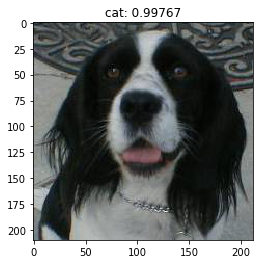

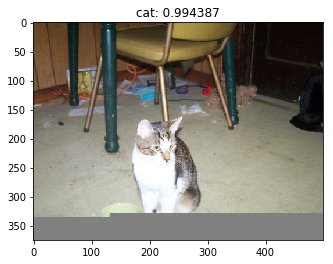

In [12]:
for i in indicies[:5]:
    img = plt.imread(Y_te[i])
    plt.imshow(img)
    plt.title(caption(preds[i], probs[i, preds[i]]))
    plt.show()

# Finetune the model

In [8]:
model.fit(
    sess,
    1,
    16,
    (X_tr, Y_tr),
    (X_val, Y_val),
    1.0
)


Epoch 1 out of 1
313/313 [==============================] - 216s - val_loss: 0.0507 - val_acc: 0.9818   
Validation loss = 0.00317 and accuracy = 0.982


### Predict after finetune

In [9]:
after_train_preds, after_train_probs = model.predict(sess, (X_te, Y_te), 32)

391/391 [==============================] - 477s   


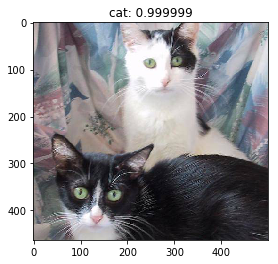

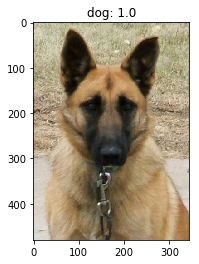

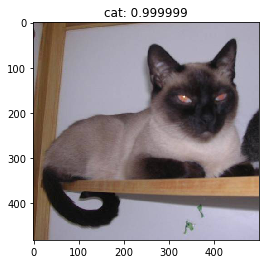

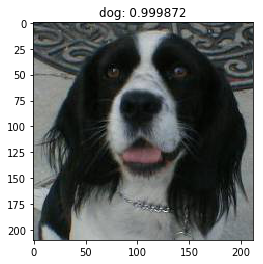

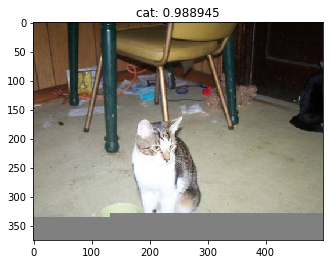

In [13]:
for i in indicies[:5]:
    img = plt.imread(Y_te[i])
    plt.imshow(img)
    plt.title(caption(after_train_preds[i], after_train_probs[i, after_train_preds[i]]))
    plt.show()